# Signal-to-Noise Ratio
This tutorial covers how one can can create the SNR object that will be used to scale the noise extracted
from the experimental data. The extraction process is described in the Methods section of the paper, but the
extracted example values are available, so please refer to the Methods section to extract the SNR from your
own dataset.

## Load Libraries

In [1]:
import sys
import numpy as np
from pathlib import Path
sys.path.append(str(Path.cwd()) + "/../src")

import EMCrafter
from EMCrafter.snr import SNR
EMCrafter.base._set_logging(minimal=True)

## Initialize SNR: Flat

SNR initialized


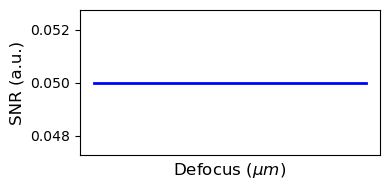

In [2]:
# Initializes class with a flat value of 0.05 without any empirical factor
snr = SNR(snr=0.05, verbose=2)

# Visualize
fig = snr.plot()

## Customized SNR

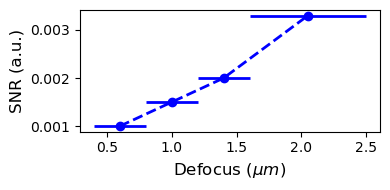

In [3]:
# Create a set of defocus bin edges
bin_edges = np.array([4000, 8000, 12000, 16000, 25000]).astype(np.float16)

# With the corresponding SNR, for example:
values = np.array([0.00050, 0.00075, 0.00100, 0.00165])

# Defocus unit (for normalization purposes)
unit = "A" # or "um"

# Set values and scaling factor
snr.set_histo(bin_edges, values, unit, emp_factor=2.)

# Visualize
fig = snr.plot()

In [4]:
# This class returns the corresponding bin SNR given input
# defocus values. To return the values with interpolation, set:
snr.set_value_func(interpolate=True)
defocus_single = .9                        # In micrometers
snr.value(defocus_single)

0.0013751219512195122

In [5]:
# The function is also vectorized:
defocus_arr = [.5, 1., 1.5, 2.] # In micrometers
snr.value(defocus_arr)

array([0.001    , 0.0015   , 0.0021991, 0.0031985])

In [6]:
# Or, set no interpolation:
snr.set_value_func(interpolate=False)
snr.value(defocus_arr)

array([0.001 , 0.0015, 0.002 , 0.0033])

## Storing/Loading class

In [7]:
# Save object
snr.save("data/pickle/snr.pkl")
# Load generator
snr = SNR().load("data/pickle/snr.pkl")

Saving SNR object  to  data/pickle/snr.pkl
Loaded SNR object from data/pickle/snr.pkl
